## A/B-тест крупного интернет-магазина

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

### Часть 1. Приоритизация гипотез.

Для начала откроем файл с гипотезами для ознакомления и предварительного анализа предоставленной информации.

In [45]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [46]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [47]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В датафрейме есть 9 различных гипотез, у каждой из которых в определенной степени выражен охват пользователей по 10-балльной шкале; влияние на пользователей по 10-балльной шкале; уверенность в гипотезе по 10-балльной шкале и затраты ресурсов на проверку гипотезы по 10-балльной шкале. Помимо этого можно сказать что в данных нет пропусков и все показатели, которые требуется для методов ICE и RICE на месте.

Примените фреймворк ICE для приоритизации гипотез. Данный фреймворк учитывает параметры **«влияние, уверенность, усилия / простота»**. Отсортируем их по убыванию приоритета.

In [48]:
hypothesis['ICE']=hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
hypothesis[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективными гипотезами по ICE являются: 8, 0, 7 и 6.

Примените фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
Во фреймворке ICE нет показателя «охват», но в наших интересах учитывать охват пользователей тестируемой гипотезой. Поэтому приоритезируем наши гипотезы фреймворком RICE. Помимо показателей, которые учитываются в ICE, данный фреймворк учитывает и охват пользователей:

In [49]:
hypothesis['RICE']=(hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts'])
hypothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


А с точки зрения RICE наиболее приоритетными являются гипотезы 7,2,0 и 6.

#### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

В целом 3 из 4 гипотез по методам RICE и ICE имеют высокую приоритетность благодаря обоим методам приоритизации. Тем не менее, с введением нового критерия - Reach — охват пользователей по 10-балльной шкале, результат перемешался. В итоге самой влиятельной стала гипотеза 7, которая до этого была третьей. Таким образом, введением нового критерия изменило приоритизацию, но общий тренд по приоритетности сохраняется.

### Часть 2. Анализ A/B-теста

Познакомимся с данными для A/B-теста. И выведем информацию о датафреймах.

In [50]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [51]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [52]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [53]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Итак, мы рассмотрели данные обоих датафреймов, познакомились с типами данных в них. Так, в обоих датафреймах колонка с датой представлена строкой, а не в формате времени. Преобразуем эти столбцы в формат времени.

### Анализируем A/B-тест

##### 1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

С помощью лямбда функции изменим формат дат на релевантный. Далее, выведем график накапливаемых за период данных по группам A и B.

In [54]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [55]:
datesGroups = orders[['date','group']].drop_duplicates()

Соберём агрегированные кумулятивные по дням данные о заказах и посетителях:

In [56]:
ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitorId' : pd.Series.nunique,
'transactionId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [57]:
visitorsAggregated = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А и В:

In [58]:
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]

Построим график выручки группы А и В:

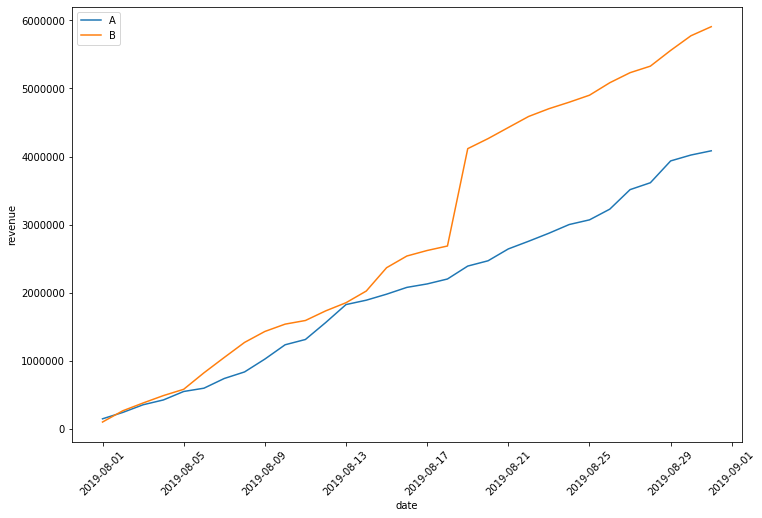

In [90]:
plt.figure(figsize=(12, 8))
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')
plt.legend()



plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('revenue')
plt.show()

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак. Выручка группы А растет равномерно в течение всего теста. Однако график выручки группы В в одной точке резко растет (примерно в середине теста). Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы проанализируем отдельно.

##### 2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

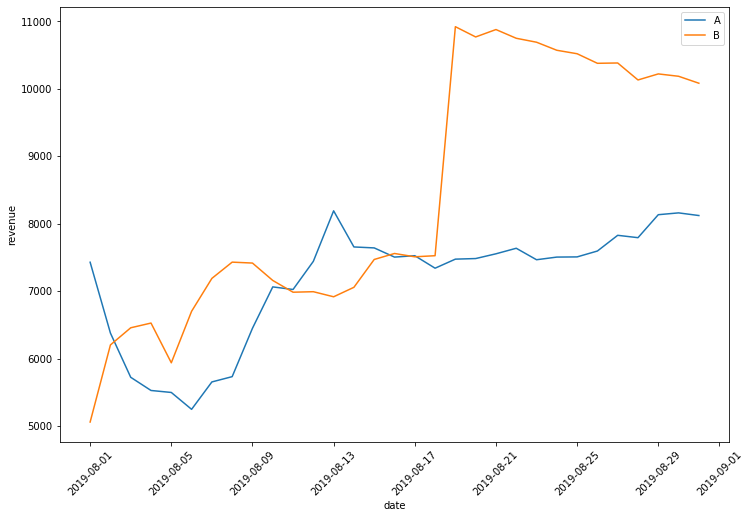

In [91]:
plt.figure(figsize=(12, 8))
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='B')
plt.legend()
plt.xlabel('date')
plt.ylabel('revenue')
plt.xticks(rotation=45)
plt.show()

Кумулятивное значение среднего чека по группам А и В продолжает колебаться. Кроме того, во второй половине теста у группы В наблюдается резкий скачек среднего чека, который потом постепенно снижается, а у группы А наоборот плавно растет. Принимать решение по такой метрике рано. Далее требуется дополнительный анализ выбросов, которые так сильно искажают результаты.

##### 3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

Собираем данные в одном датафрейме:

In [61]:
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Построим отношение средних чеков и добавим ось X:

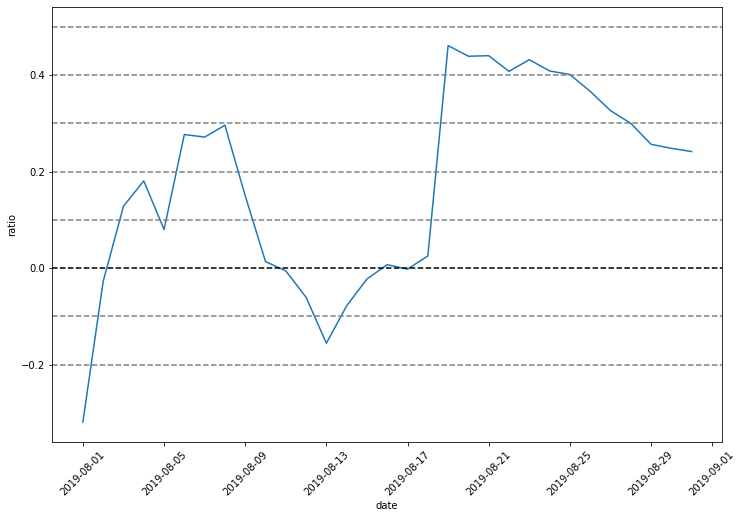

In [92]:
plt.figure(figsize=(12, 8))
plt.plot(mergedCummulativeRevenue['date'], (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)

plt.axhline(y=0.5, color='grey', linestyle='--')
plt.axhline(y=0.4, color='grey', linestyle='--')
plt.axhline(y=0.3, color='grey', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axhline(y=-0.2, color='grey', linestyle='--');

plt.xlabel('date')
plt.ylabel('ratio')
plt.xticks(rotation=45)
plt.show()

Из графика относительного различия в среднем чеке между группами А и В следует, что результаты теста значительно и резко менялись в несколько дат. Возможно, в те даты были совершены аномальные заказы или проводились промо акции интернет-магазина.

##### 4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

Посчитаем кумулятивную конверсию:

In [63]:
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']

Отделим данные по группе A:

In [64]:
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']

Отделим данные по группе В:

In [65]:
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

Построим графики и зададим масштаб осей:

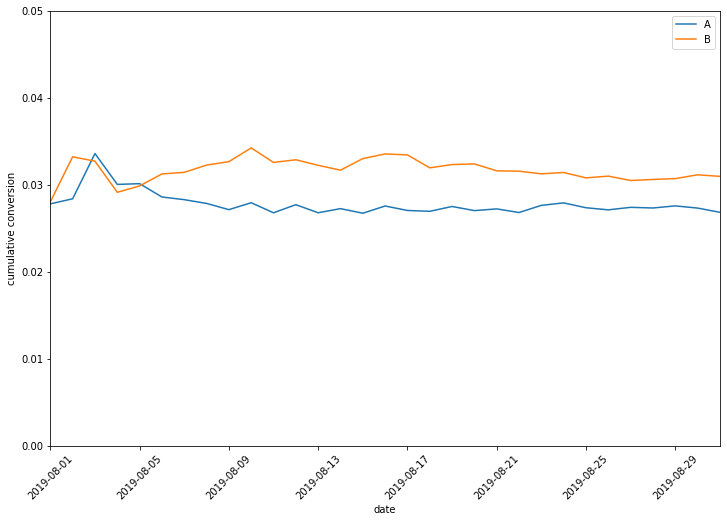

In [93]:
plt.figure(figsize=(12, 8))
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('date')
plt.ylabel('cumulative conversion')

plt.axis(["2019-08-01", '2019-08-31', 0, 0.05])
plt.xticks(rotation=45)
plt.show()

Практически симметричный график получился! Группы колебались около одного значения, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

##### 5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

Построим график относительного различия кумулятивных конверсий:

In [67]:
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

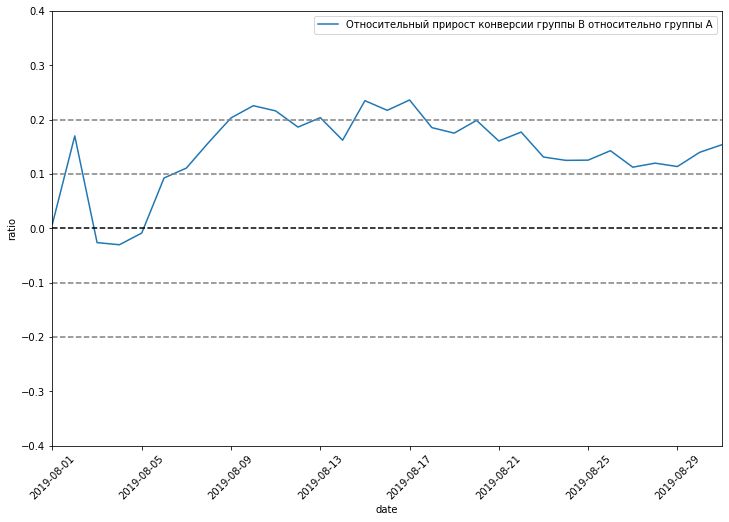

In [94]:
plt.figure(figsize=(12, 8))
plt.plot(mergedCummulativeConversions['date'], mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axhline(y=-0.2, color='grey', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.4, 0.4])

plt.xlabel('date')
plt.ylabel('ratio')
plt.xticks(rotation=45)
plt.show()

В самом начале теста группа В лидирует по конверсии и выдает резкое падение, уступая группе А. Но затем снова резко растет и колеблется в районе 20% прироста относительно группы А. Затем постепенно идет на спад и в самом конце теста снова берет тренд на рост. В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину.

##### 6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

Посмотрим на количество заказов по пользователям и визуализируем этот показатель на точечном графике:

In [69]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['userId','orders']

Посмотрим сколько пользователей делает определенное количество заказов:

In [70]:
ordersByUsers['orders'].value_counts()

1     937
2     64 
3     17 
5     6  
4     3  
11    2  
9     1  
8     1  
Name: orders, dtype: int64

Text(0, 0.5, 'count')

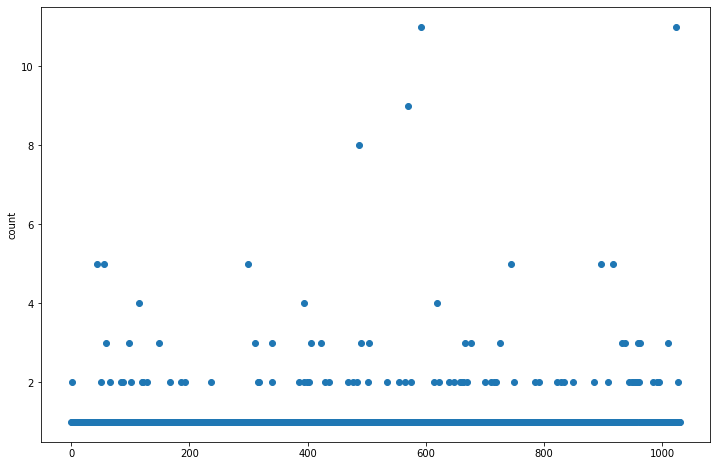

In [95]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(12, 8))
plt.scatter(x_values, ordersByUsers['orders'])
plt.ylabel('count')

Доля пользователей с 2-4 заказами значительна. Их точная доля не ясна — пока непонятно, считать их аномалиями или нет. Чтобы это понять - рассчитаем перцентили.

##### 7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [72]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

Отсечение по 2 заказам. Только не более 5% пользователей сделало более 2 заказов. И 10% - более 1 заказа. А не более 1% - 4 заказа и более. Следовательно, отсечем выбросы по 2 заказам.

##### 8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

Теперь визуализируем график стоимостей заказов, чтобы увидеть разброс значений и понять как много есть аномальных показателей:

Text(0, 0.5, 'count')

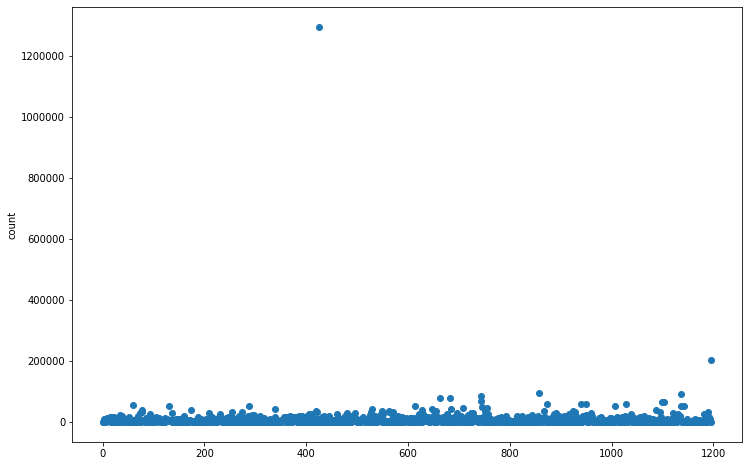

In [96]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(12, 8))
plt.scatter(x_values, orders['revenue'])
plt.ylabel('count')

Стоимость заказов распределена достаточно равномерно. Однако есть выбросы на 200 тысяч, и более 1 млн 200 тысяч. Это явно аномалии для интернет-магазина. Только если он торгует совсем уникальным и старинным антиквариатом. Посчитаем перцентили для выявления аномалий.

##### 9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [74]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Как следует из расчета перцентилей: всего 10% пользователей потратили более 18 тыс рублей в интеренет-магазине, 5% более 28 тысяч и 1% - более 58 тысяч. Следовательно, более 28000 - аномальная стоимость.

##### 10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Подготовим данные:

In [75]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

0.00840
0.138


Итак, P-value меньше 0.05, потому нулевую гипотезу о том, что конверсии групп равны, отвергаем. Анализ «сырых данных» сообщает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы A равен 13.8%.

##### 11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [76]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


Р-value значительно больше 0.05, следовательно, статистически значимых отличий в среднем чеке между группами нет. Кроме того, относительное различие среднего чека между сегментами 25.9%

##### 12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами по "сырым" данным, передадим критерию mannwhitneyu() данные о выручке с заказов:

In [77]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] >  28000]['visitorId']

In [78]:
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
(74,)


Всего 58 аномальных пользователей. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [79]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [80]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
0.173


P-value значительно меньше 0.05, потому нулевую гипотезу о том, что конверсии групп равны, снова отвергаем. Анализ «очищенных» данных сообщает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы A равен 17.6%. Как и в случае с сырыми данными, группа B значительно лучше группы A.

##### 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [81]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

0.369


In [82]:
print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

-0.020


P-value увеличился, но и разница между сегментами сократилась с 2.59% до 0.1%. В целом, общие выводы по результатам теста не изменились, как и прежде, статистически значимых отличий в среднем чеке между группами А и В нет.

Примите решение по результатам теста и объясните его. Варианты решений: 
    1. Остановить тест, зафиксировать победу одной из групп. 
    2. Остановить тест, зафиксировать отсутствие различий между группами. 
    3. Продолжить тест.

Итак, в ходе проведения А/В теста мы получили следующие факты:

- есть статистичнески значимые различия между конверсией групп А и В как по "сырым", так и по "чистым" данным;
- отсутствуют статистически значимые различия по среднему чеку между группами по «сырым» и по данным после фильтрации аномалий;
- график различия относительной конверсии между группами сообщает, что результаты группы B лучше, чем у группы A.

Считаю, что на основании полученных выводов можно отметить, что группа В лучше группы А, тест стоит остановить и зафиксировать победу группы В.